## Introduction: Definitions
 
- Define Variable Categories
    - There are several different categories of variables:

    - Individual Variables: these are characteristics of each individual rather than the household
        - Boolean: Yes or No (0 or 1)
        - Ordered Discrete: Integers with an ordering

    - Household variables
        - Boolean: Yes or No
        - Ordered Discrete: Integers with an ordering

    - Continuous numeric
        - Squared Variables: derived from squaring variables in the data
        - Id variables: identifies the data and should not be used as features

    - Below we manually define the variables in each category. This is a little tedious, but also necessary.

In [5]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickles
plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
all_data = pd.read_pickle("./pickles/all_data.pkl")

In [7]:
# Correctly labeling the data based on their data type

# Ids
id_ = ['Id', 'idhogar', 'Target']

# Boolean features that pertain to an individual
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 'parentesco1', 
            'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 
            'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 'parentesco11', 
            'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 
            'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9', 'mobilephone', 'rez_esc-missing']

# Ordered (order matters) features that pertain to an individual
ind_ordered = ['rez_esc', 'escolari', 'age']

# Boolean features that pertain to the household
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 'paredpreb',
           'pisocemento', 'pareddes', 'paredmad','paredzinc', 'paredfibras', 'paredother', 
           'pisomoscer', 'pisoother', 'pisonatur', 'pisonotiene', 'pisomadera','techozinc', 
           'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 'abastaguadentro', 
           'abastaguafuera', 'abastaguano', 'public', 'planpri', 'noelec', 'coopele', 
           'sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6', 'energcocinar1', 
           'energcocinar2', 'energcocinar3', 'energcocinar4', 'elimbasu1', 'elimbasu2', 'elimbasu3', 
           'elimbasu4', 'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3', 'etecho1', 
           'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 'tipovivi1', 'tipovivi2', 'tipovivi3', 
           'tipovivi4', 'tipovivi5', 'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']

# Ordered (order matters) features that pertain to the household
hh_ordered = ['rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

# Continous features that pertain to the household
hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

# Square features in our dataset
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin', 
        'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']


In [8]:
# Verifying that there aren't repated features
from collections import Counter

columns_x = id_ + ind_bool + ind_ordered + hh_bool + hh_cont + hh_ordered + sqr_
print('There are no repeated values', np.all(np.array(list(Counter(columns_x).values())) == 1))
print('We covered every variable: ', len(columns_x) == all_data.shape[1])

There are no repeated values True
We covered every variable:  True


## Data Analysis: Columns Type

### Squared Columns

There are several features that are the square of another feature: Area and AreaSquared.

For the most part, you should delete a feature that's expresses another feature. 

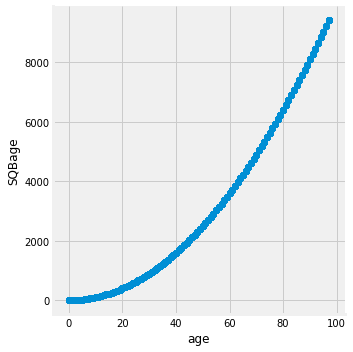

In [9]:
# As should be noted, there's a high correlation btw a value and its square value...
sns.lmplot('age', 'SQBage', data=all_data, fit_reg=False)

In [10]:
# Removing square features as it does not add anything to our dataset
all_data = all_data.drop(sqr_, axis=1)
all_data.shape

(33413, 136)

### Id Columns
- Id columns should be kept since we need to maintain the same structure

### Household Level Columns

In [11]:
# Storing the household features
hh_vars = hh_bool + hh_cont + hh_ordered + id_
heads = all_data.loc[all_data['parentesco1'] == 1, hh_vars]
heads.shape

(10307, 99)

#### Notes:
- We do not need to make much adjustments. However, we could look at values that are redudant. Meaning, there could be features that are correlated with one another. If that's the case, we should think about removing correlated features as it could decrease computational efficiency.

In [12]:
def get_corrs_matrix(data, corr_threshold=0.95):
    """Returns a list: A correlation matrix where columns are drop based on the correlation threshold"""
    corr_matrix = data.corr()
    
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find features with correlation greater than 0.95
    to_drop = [c for c in upper.columns if any(abs(upper[c]) > corr_threshold)]
    
    return [corr_matrix, to_drop]

In [13]:
# Features that have a high correlation with other features in our dataset
corr_matrix, corr_values = get_corrs_matrix(heads)
corr_values

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

In [15]:
# Dataframes of high correlated features with features in our dataset (must have a .9 correlation)
for feat in corr_values:
    corr_df = corr_matrix.loc[corr_matrix[feat].abs() > 0.9, corr_matrix[feat].abs() > 0.9]
    print(corr_df)

           public   coopele
public   1.000000 -0.967759
coopele -0.967759  1.000000
       area1  area2
area1    1.0   -1.0
area2   -1.0    1.0
                 r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000
                 r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3         1.000000  0.998287  0.910457  0.998287     0.998287
tamhog       0.998287  1.000000  0.909155  1.000000     1.000000
tamviv       0.910457  0.909155  1.000000  0.909155     0.909155
hhsize       0.998287  1.000000  0.909155  1.000000     1.000000
hogar_total  0.998287  1.000000  0.909155  1.000000     1.000000
                 r4t3    tamhog    tamviv    hhsize  hogar_total
r4t3       

#### Notes:
- Perfect correlated values are 
    - hhsize & tmhog
    - hogar_total & hhsize
    - area1 & area2
- Highly correlated values are
    - r4t3 & hhsize
    - r4t3 & hogar_total
    
- **Feature Key**:
    - r4t3: Total persons in the household
    - tamhog: size of the household
    - tamviv: number of persons living in the household
    - hhsize: household size
    - hogar_total: # of total individuals in the household

Notice that tamhog, hhsize, and hogar_total are the same variables (could drop two of these)

tamviv does not represent the same as the other values because it indicates how may people are actually in the household. Meaning, we could have more members in the household than the household

In [16]:
# Removing 'tamhog', 'hogar_total', 'r4t3'
heads.drop(['tamhog', 'hogar_total', 'r4t3'], inplace=True, axis=1)

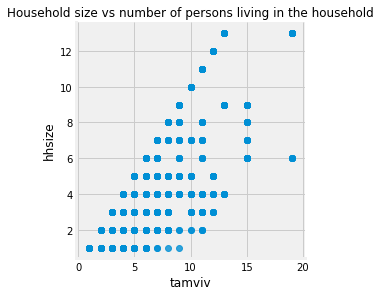

In [17]:
# Visualize hhsize and tamviv

sns.lmplot('tamviv', 'hhsize', all_data, fit_reg=False, size=4);
plt.title('Household size vs number of persons living in the household', fontdict={'fontsize': 12});

#### Notes:
- `hhsize` and `tamviv` are not the same column. While they do follow a similar trend, there could be more people living in the household that the total members of the family
- Perhaps the difference among the two features could provide further insight on poverty

In [18]:
# Calculating the difference of tamviv and hhsize
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
heads['hhsize-diff'].value_counts()

0     9901
1       98
2       90
3       84
4       61
5       28
6       14
7       11
8       11
9        8
13       1
Name: hhsize-diff, dtype: int64

In [19]:
# Creating a new electricity features with individual the value from individual features
elec = []

# Assign values for electricity (ordinal values)
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns
heads.drop(['noelec', 'coopele', 'public', 'planpri'], axis=1, inplace=True)

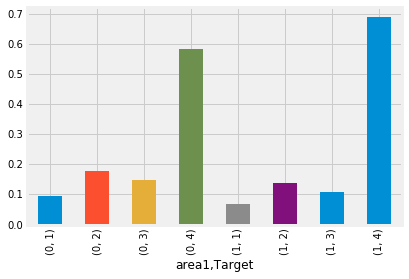

In [15]:
# Removing area2 (rural_zone boolean feature) 
heads.drop(['area2'], axis=1, inplace=True)

# Visualize the area across poverty levels
heads.groupby('area1')['Target'].value_counts(normalize=True).sort_index().plot(kind="bar")

#### Notes:
- We can remove `area2` because `area` indiccates if the house is located in a rural zone. These two options are mutually exclusive.
- It seems like households in an urban area (value of 1) are more likely to have lower poverty levels than households in a rural area (value of 0).

## Data Enginnering: Feature Creation

This is a critical process when using machine learning. Also, this is when domain expertise is a huge advantage because a domain expert can quickly access the combination, aggregation, or replacement of features.

### Ordinal Variables

Ordinal variables are categorical variables whose possible values are orderered. For example, if a feature represents level of happiness on a scale from 0 to 10, this feature will be considered a **ordinal variable**. 

However, a categorical variable that's not an ordinal variable could be what pets are in a household. The possible values could be dog, cat, rat, et cetera. You cannot rate a score to pets that has a general annoation.

In [21]:
def get_similar_cols(data, groupby_sytnax):
    """Returns columns that follow a similar groupby_sytnax"""
    return data.filter(like=groupby_sytnax, axis=1).columns.tolist()

In [25]:
# Wall Ordinal Variables
walls_columns = get_similar_cols(all_data, groupby_sytnax='epared')

# Using the position of the feature to calculate its value (order matters)
heads['walls'] = np.argmax(np.array(heads[walls_columns]), axis=1)

# Removing features that are related to the wall
heads.drop(walls_columns, axis=1, inplace=True)

In [26]:
# Roof Ordinal Variables
roof_columns = get_similar_cols(all_data, groupby_sytnax='etecho')

# Using the position of the feature to calculate its value (order matters)
heads['roof'] = np.argmax(np.array(heads[roof_columns]), axis=1)

# Removing features that are related to the wall
heads.drop(roof_columns, axis=1, inplace=True)

In [27]:
# Floor Ordinal Variables
floor_columns = get_similar_cols(all_data, groupby_sytnax='eviv')

# Using the position of the feature to calculate its value (order matters)
heads['floor'] = np.argmax(np.array(heads[floor_columns]), axis=1)

# Removing features that are related to the wall
heads.drop(floor_columns, axis=1, inplace=True)

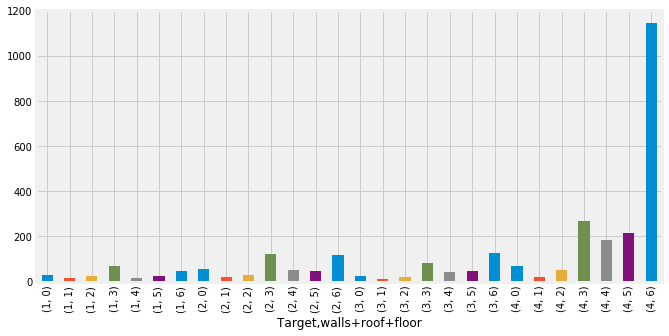

In [28]:
# Create and visualize new feature that contains walls, roof, and floor

plt.figure(figsize = (10, 5))
heads['walls+roof+floor'] = heads['walls'] + heads['roof'] + heads['floor']
heads.groupby('Target')['walls+roof+floor'].value_counts().sort_index().plot(kind="bar")

#### Notes:
- This new feature (`walls+roof+floor`) may be useful because it seems like a Target of 4 (the lowes poverty level) tends to have higher values of the 'house quality' variable. 

In [21]:
# Percentage of the each target for each ordinal wall+roof+floor value

counts = pd.DataFrame(heads.groupby(['walls+roof+floor'])['Target'].value_counts(
    normalize=True)).rename(columns = {'Target': 'Normalized Count'}).reset_index()
counts.head(5)

,walls+roof+floor,Target,Normalized Count
0,0,4,0.376404
1,0,2,0.320225
2,0,1,0.162921
3,0,3,0.140449
4,1,4,0.323529


In [29]:
# Creating feature that contains features: No toilet, no electricity, no floor, no water service, no ceiling
heads['warning'] = 1 * (heads['sanitario1'] + (heads['elec'] == 0) + heads['pisonotiene'] + 
                        heads['abastaguano'] + (heads['cielorazo'] == 0))

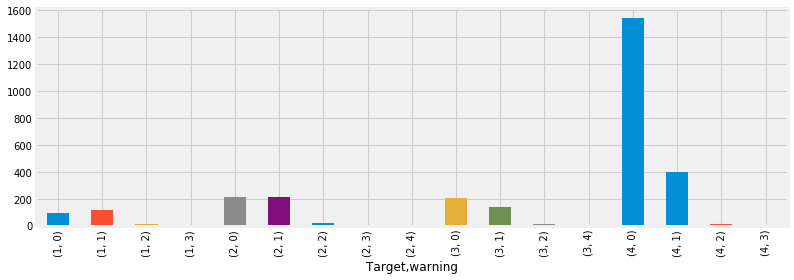

In [30]:
# Plotting the warning variable
plt.figure(figsize = (12, 4))
heads.groupby('Target')['warning'].value_counts().sort_index().plot(kind="bar")

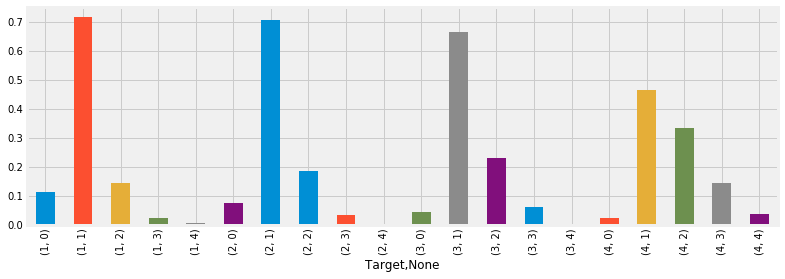

In [31]:
# Creating feature that contains features: refrigerator, computer, tablet, and television
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + 
                      (heads['v18q1'] > 0) + heads['television'])

# Plotting the bonus variable
plt.figure(figsize=(12,4))
heads.groupby('Target')['bonus'].apply(lambda x: x.value_counts()/len(x)).sort_index().plot(kind="bar")

In [32]:
# Lastly, creating some percentage features
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

## Data Analysis

### Household Variables
We will use two methods to calculate the inter-correlation among the features:
- Pearson Correlation and the Spearman Correlation.
- Continous Variable: A continuous variable is a variable that has an infinite number of possible values.
- Orginal Variable: An ordinal variable is a categorical variable for which the possible values are ordered.

**Pearson Correlation**:
- The Pearson Correlation: from -1 to 1 measuring the linear relationship between two variables.
- The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.
- Guideline:
    - .00-.19 “very weak”
    - .20-.39 “weak”
    - .40-.59 “moderate”
    - .60-.79 “strong”
    - .80-1.0 “very strong”

**Spearman Correlation**:
- The Spearman Correlation: from -1 to 1 measuring the monotonic relationship between two variables
- The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables
- In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.
- Rather than using the data values, it will compare the ranking of two different features. 
    - For example, if we have age and money, we compare its rank between both feature. If you are the youngest, you're rank 1 for age. If you are the poorest, you're rank 1 for monet.

**Additional Notes**:
- The Spearman correlation is 1 if as one variable increases, the other does as well, even if the relationship is not linear. On the other hand, the Pearson correlation can only be one if the increase is exactly linear. 

In [33]:
# In order to calculate pearson correlation with the target feature, we need to filter to the train_set
heads_train = heads.loc[heads['Target'].notnull(), :].copy()
heads_train['Target'] = heads_train['Target'].astype('int64')
pcorrs = pd.DataFrame(heads_train.corr()['Target'].sort_values(ascending=False)).rename(columns=
                                                                        {"Target": 'P_corr'}).reset_index()
# Top positive correlated Values
pcorrs = pcorrs.rename(columns={'index': 'feature'})
pcorrs.head(6)[1:]

,feature,P_corr
1,meaneduc,0.333652
2,walls+roof+floor,0.332446
3,floor,0.307605
4,phones-per-capita,0.299026
5,walls,0.298737


In [34]:
# Top negative correlated values
pcorrs.dropna().tail(5)

,feature,P_corr
88,r4m1,-0.209479
89,overcrowding,-0.234954
90,r4t1,-0.260917
91,hogar_nin,-0.266309
92,warning,-0.301791


#### Notes:
- Negative correlation: as we increase the value, poverty will increase. E.g. as our warning increases, the level of poverty will begin to decrease. 
- Overcrowing and hogar_nin (children under the age of 19) worsen poverty for households.
- For the positive values, walls, roof, and floor indicates that an improvement in those variables will eventually decrease poverty.

### Spearman Correlation:

In [35]:
import warnings
from scipy.stats import spearmanr

warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation and pvalue
        scorr.append(spearmanr(heads_train[c], heads_train['Target']).correlation)
        pvalues.append(spearmanr(heads_train[c], heads_train['Target']).pvalue)

# Top Positive correlated values
scorrs = pd.DataFrame({'feature': feats, 'S_corr': scorr, 'pvalue': pvalues}).sort_values('S_corr', ascending=False)
scorrs.head(5)

,S_corr,feature,pvalue
86,0.338791,walls+roof+floor,9.539346e-81
89,0.337377,phones-per-capita,4.760104e-80
85,0.309638,floor,4.466091e-67
22,0.300996,cielorazo,2.611808e-63
83,0.298963,walls,1.925370e-62


In [36]:
# Top negative correlated values
scorrs.dropna().tail(5)

,S_corr,feature,pvalue
7,-0.209387,pisocemento,8.270816e-31
70,-0.219226,r4t1,1.112230e-33
75,-0.236225,hogar_nin,5.567218e-39
58,-0.281516,dependency,2.792620e-55
87,-0.307326,warning,4.682829e-66


In [37]:
# Comparing the pearson and spearson correlation

corrs = pcorrs.merge(scorrs, on='feature')
corrs['diff'] = corrs['P_corr'] - corrs['S_corr']
corrs['abs_diff'] = np.abs(corrs['diff'])
corrs.sort_values(by='diff', ascending=False).head(5)

,feature,P_corr,S_corr,pvalue,diff,abs_diff
78,dependency,-0.126465,-0.281516,2.792620e-55,0.155051,0.155051
31,edjefa,0.052310,0.005114,7.804715e-01,0.047197,0.047197
10,edjefe,0.235687,0.214736,2.367521e-32,0.020951,0.020951
46,hogar_mayor,-0.025173,-0.041722,2.290994e-02,0.016549,0.016549
39,techozinc,0.014357,0.003404,8.528369e-01,0.010954,0.010954


In [38]:
# Storing the household columns
household_feats = list(heads.columns)

### Individial Variables

In [39]:
# Calculating the shape of the individual features
ind = all_data[id_+ind_bool+ind_ordered]
ind.shape

(33413, 40)

In [40]:
# Calculates the high-correlated feature at an individual basis
corr_matrix, corrs_to_drop = get_corrs_matrix(ind)
corrs_to_drop

['female']

In [41]:
# Male and Female are mutullaly exclusive features... removing male
ind.drop(['male'], axis=1, inplace=True)

/Users/alexguanga/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [42]:
# instl has multiple features based on their order (instl: level of education)
instl_vars = get_similar_cols(ind, 'instl')
ind[instl_vars].head(5)

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


/Users/alexguanga/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


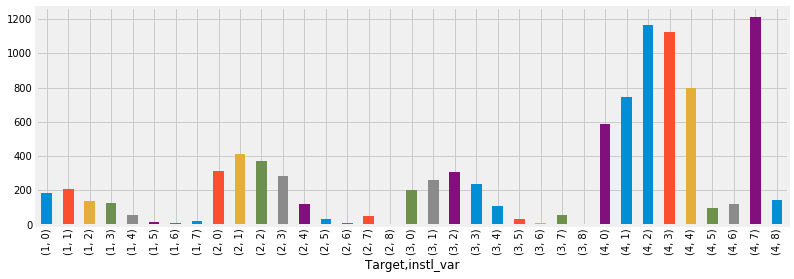

In [43]:
# Creating the ordinal columns with the instl_var
ind['instl_var'] = np.argmax(np.array(ind[[c for c in instl_vars]]), axis=1)

# Plotting the instl_var
plt.figure(figsize=(12, 4))
ind.groupby('Target')['instl_var'].value_counts().sort_index().plot(kind="bar")

#### Notes:
- Higher level of education can reduce poverty

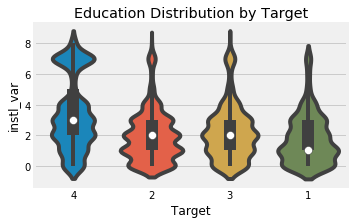

In [44]:
plt.figure(figsize = (5, 3))
sns.violinplot(x='Target', y='instl_var', data=ind);
plt.title('Education Distribution by Target');

## Data Engineering

#### Notes:
- Calculating the ratio of features can help us better understand their importance
- Normalzing the features could help us intepret their importance

In [48]:
pd.options.mode.chained_assignment = None  # default='warn'

In [49]:
# The total number of schooling by age could reveal if their education has an important weight in their lvies
ind['escolari/age'] = ind['escolari']/ind['age']

# The level of education by their age
ind['instl_var/age'] = ind['instl_var']/ind['age']

# We can also calculate the years behind in school. Could they be old and still in school?
ind['rez_esc/age'] = ind['rez_esc']/ind['age']

In [50]:
# The total number of gadgets in a household
ind['tech_gadgets'] = ind['mobilephone'] + ind['v18q']

### Feature Enginnering: Aggregations

In [43]:
# Creating the range functions
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(['Target'], axis=1).groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                ...   rez_esc/age  \
           min max sum count  std range_ min max sum count  ...           sum   
idhogar                                                     ...                 
000a08204    1   1   3     3  0.0      0   0   0   0     3  ...           0.0   
000bce7c4    0   0   0     2  0.0      0   0   1   1     2  ...           0.0   
001845fb0    0   0   0     4  0.0      0   0   0   0     4  ...           0.0   
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...           0.0   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...           0.0   

                            tech_gadgets                            
          count  std range_          min max sum count  std range_  
idhogar                                                             
000a08204     3  0.0    0.0            2   2   6     3  0.0      0  
000bce7c4     2  0.0    0.0            1   1   2     2  0.0      0  
001845fb0     3  0.0    0.0            1   1   4     4  0.0      0  
001ff74ca     1  NaN    0.0            2   2   4     2  0.0      0  
003123ec2     4  0.0    0.0            1   1   4     4  0.0      0  

[5 rows x 240 columns]

In [44]:
# Renaming the aggreagation columns
new_col = []
for col in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{col}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head(5)

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,...,rez_esc/age-sum,rez_esc/age-count,rez_esc/age-std,rez_esc/age-range_,tech_gadgets-min,tech_gadgets-max,tech_gadgets-sum,tech_gadgets-count,tech_gadgets-std,tech_gadgets-range_
idhogar,,,,,,,,,,,,,,,,,,,,,
000a08204,1,1,3,3,0.0,0,0,0,0,3,...,0.0,3,0.0,0.0,2,2,6,3,0.0,0
000bce7c4,0,0,0,2,0.0,0,0,1,1,2,...,0.0,2,0.0,0.0,1,1,2,2,0.0,0
001845fb0,0,0,0,4,0.0,0,0,0,0,4,...,0.0,3,0.0,0.0,1,1,4,4,0.0,0
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,...,0.0,1,NaN,0.0,2,2,4,2,0.0,0
003123ec2,0,0,0,4,0.0,0,0,0,0,4,...,0.0,4,0.0,0.0,1,1,4,4,0.0,0


In [45]:
# Removing the variables that are redundant because its high correlation
corr_matrix, ind_agg_to_drop = get_corrs_matrix(ind_agg)
len(ind_agg_to_drop)

117

In [46]:
# Storing the individual variables
ind_agg = ind_agg.drop(ind_agg_to_drop, axis=1)
ind_feats = ind_agg.columns.tolist()

In [47]:
# Merging with household data
final_ = heads.merge(ind_agg, on='idhogar', how='left')

print("Shape of the final dataset is {}".format(final_.shape))

Shape of the final dataset is (10307, 218)


In [48]:
final_.head(5)

,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,pisocemento,pareddes,paredmad,...,escolari/age-sum,escolari/age-std,escolari/age-range_,instl_var/age-max,instl_var/age-std,instl_var/age-range_,tech_gadgets-min,tech_gadgets-sum,tech_gadgets-std,tech_gadgets-range_
0,0,0,1,1,1,0,0,0,0,0,...,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,0,0,1,1,0,0,0,0,0,1,...,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,0,0,1,1,0,0,0,0,0,1,...,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,0,0,1,1,1,0,0,0,0,0,...,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,1,0,1,1,1,0,0,0,0,0,...,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


## Data Analysis

In [49]:
final_['Target'] = final_['Target'].dropna().astype('int64')
corrs = final_.corr()['Target']

# Most negative correlated related to target
corrs.sort_values().head()

warning          -0.301791
instlevel2-sum   -0.297868
instlevel1-sum   -0.271204
hogar_nin        -0.266309
r4t1             -0.260917
Name: Target, dtype: float64

In [50]:
# Most positive correlated related to target
corrs.sort_values().dropna().tail(6)[:5]

instlevel8-max      0.317815
walls+roof+floor    0.332446
meaneduc            0.333652
instl_var-max       0.368229
escolari-max        0.373091
Name: Target, dtype: float64

## Data Viz: Highly Correlated Features

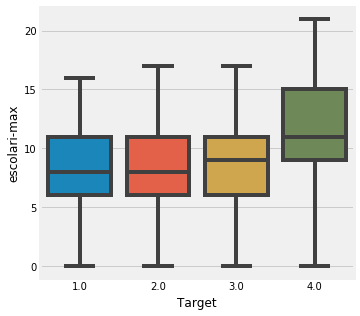

In [51]:
# Plotting boxplots for highly correlates values
plt.figure(figsize=(5,5))
sns.boxplot(x='Target', y='escolari-max', data=final_)

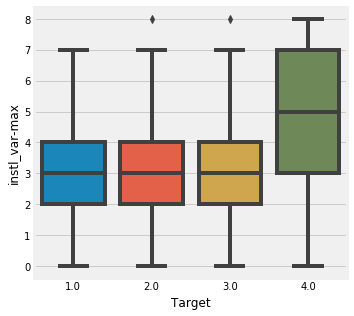

In [52]:
# Plotting boxplots for highly correlates values
plt.figure(figsize=(5,5))
sns.boxplot(x='Target', y='instl_var-max', data=final_)

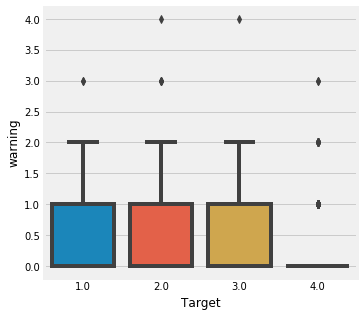

In [53]:
# Plotting boxplots for highly correlates values
plt.figure(figsize=(5,5))
sns.boxplot(x='Target', y='warning', data=final_)

In [54]:
# Finding female head gender
head_gender = ind.loc[ind['parentesco1'] == 1, ['idhogar', 'female']]
final_ = final_.merge(head_gender, on='idhogar', how='left').rename(columns={'female': 'female-head'})

In [55]:
# Understanding the distribution of the target variable 
final_.groupby('female-head')['Target'].value_counts(normalize=True)

female-head  Target
0            4.0       0.682873
             2.0       0.136464
             3.0       0.123204
             1.0       0.057459
1            4.0       0.617369
             2.0       0.167670
             3.0       0.113500
             1.0       0.101462
Name: Target, dtype: float64

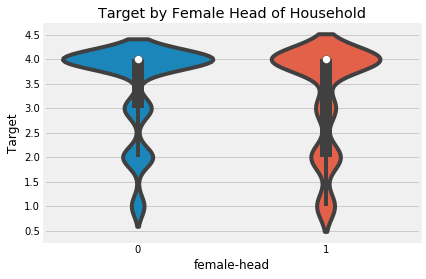

In [56]:
sns.violinplot(x='female-head', y='Target', data=final_);
plt.title('Target by Female Head of Household');

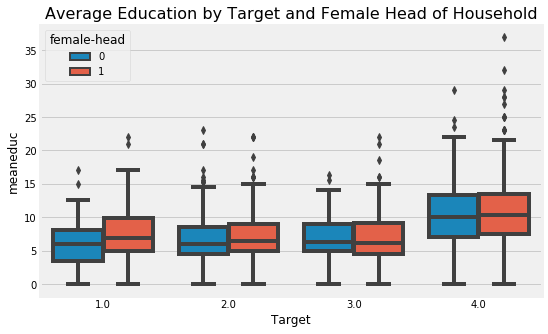

In [57]:
plt.figure(figsize = (8, 5))
sns.boxplot(x='Target', y='meaneduc', hue='female-head', data=final_);
plt.title('Average Education by Target and Female Head of Household', size = 16);

In [58]:
final_.groupby('female-head')['meaneduc'].agg(['mean', 'count'])

,mean,count
female-head,,
0,8.968025,6384
1,9.237013,3903


#### Notes:
- Despite females having higher levels of education, we can see that they will have higher less of poverty if they are the head of the household.

## Saving Datasets

In [60]:
final_.to_pickle('./pickles/final.pkl')